In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle

In [2]:
# Read CSV
train_df = pd.read_csv('./mnist_train.csv')
test_df = pd.read_csv('./mnist_test.csv')

def create_arrays(dataframe):
    dataframe_array=[[] for k in range(10)]
    for index, row in dataframe.iterrows():
        k = row[0]
        array = row[1 : ]
        dataframe_array[k].append(np.array(array).reshape(28*28))   
    return np.array(dataframe_array)

train_arrays = create_arrays(train_df)
test_arrays = create_arrays(test_df)
print(train_arrays.shape, test_arrays.shape)

(10,) (10,)


In [3]:
# Def Euclidean Distance
def euclidean_distance(x1, x2):
    return np.linalg.norm(x2-x1)

# Create the update rules for NMF
def NMF_Fit(V, W, H, max_iterations, reconstruction_error, epsilon):
    for iteration in range(max_iterations):
        H_prev = np.dot(W.T , V)
        H_curr = np.maximum(np.dot(W.T , W) , epsilon)
        H_curr = np.maximum(np.dot(H_curr , H), epsilon)
        H = H*(H_prev/H_curr)
        W_prev = np.dot(V, H.T)
        W_curr = np.maximum(np.dot(W , H) , epsilon)
        W_curr = np.maximum(np.dot(W_curr , H.T), epsilon)
        W = W*(W_prev/W_curr)
        V_hat = np.dot(W, H)
        reconstruction_error.append(euclidean_distance(V, V_hat))
    return W, H, V_hat, reconstruction_error

In [4]:
# Set random seed and set the hyperparameters
np.random.seed(0)
bases = []
train_weights = []
reconstruction_errors = []
nmf_components = 3
max_iterations = 50
epsilon = 1e-20

# Apply the update rules of NMF
for i in range(10):
    train_samples = len(train_arrays[i])
    V = np.array([x for x in train_arrays[i]]).T
    W = np.random.rand(V.shape[0] , nmf_components)
    H = np.random.rand(nmf_components, V.shape[1])
    reconstruction_error = []
    W, H, V_hat, reconstruction_error = NMF_Fit(V, W, H, max_iterations, reconstruction_error, epsilon)
    bases.append(W)
    train_weights.append(H)
    reconstruction_errors.append(reconstruction_error) 

In [5]:
## For 3D
bases_3d = []
train_weights_3d = []
reconstruction_errors_3d = []
V_3d = []
for i in range(10): 
    for x in train_arrays[i]:
        V_3d.append(x)
V_3d = np.array(V_3d).T
W_3d = np.random.rand(V_3d.shape[0] , nmf_components)
H_3d = np.random.rand(nmf_components, V_3d.shape[1])
W_3d, H_3d, _, reconstruction_error = NMF_Fit(V_3d, W_3d, H_3d, max_iterations, [], epsilon)
bases_3d.append(W_3d)
train_weights_3d.append(H_3d)
reconstruction_errors_3d.append(reconstruction_error)

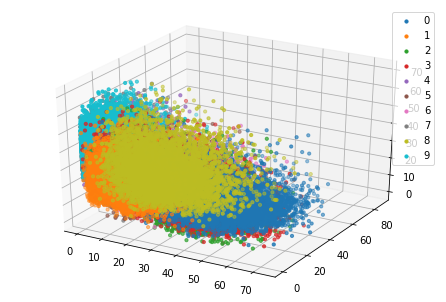

In [6]:
## Plot 3d low dimensional represnetations 
figure = plt.figure()
axes = Axes3D(figure)
k=0
for i in range(0, 10):
    axes.scatter(train_weights_3d[0][0, k:k+len(train_arrays[i])],
                 train_weights_3d[0][1, k:k+len(train_arrays[i])],
                 train_weights_3d[0][2, k:k+len(train_arrays[i])], label=i, s=10)
    k=k+len(train_arrays[i])
axes.legend()
plt.show()

In [7]:
## For 2D
bases_2d = []
train_weights_2d = []
reconstruction_errors_2d = []
V_2d = []
for i in range(10): 
    for x in train_arrays[i]:
        V_2d.append(x)
V_2d = np.array(V_2d).T
W_2d = np.random.rand(V_2d.shape[0] , nmf_components)
H_2d = np.random.rand(nmf_components, V_2d.shape[1])
W_2d, H_2d, _, reconstruction_error = NMF_Fit(V_2d, W_2d, H_2d, max_iterations, [], epsilon)
bases_2d.append(W_2d)
train_weights_2d.append(H_2d)
reconstruction_errors_2d.append(reconstruction_error)

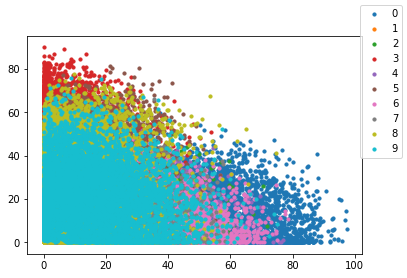

In [8]:
## Plot 2d low dimensional represnetations 
figure = plt.figure()
k=0
for i in range(0, 10):
    plt.scatter(train_weights_2d[0][0, k:k+len(train_arrays[i])],
                 train_weights_2d[0][1, k:k+len(train_arrays[i])], label=i, s=10)
    k=k+len(train_arrays[i])
figure.legend()
plt.show()

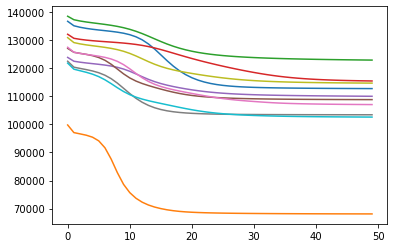

In [9]:
# Plot the reconstrunction error vs iterations
file_bases = open('bases.pkl', 'wb')
file_train_weights = open('train_weights.pkl','wb')
pickle.dump(bases, file_bases)
pickle.dump(train_weights,file_train_weights)
file_bases.close()
file_train_weights.close()
# Plot
for i in range(10): plt.plot(reconstruction_errors[i])

In [10]:
# Predict function using NMF
def NMF_Predict(V, W, H, max_iterations, reconstruction_error, epsilon):
    for iteration in range(max_iterations):
        H_prev = np.dot(W.T , V)
        H_curr = np.maximum(np.dot(W.T , W), epsilon)
        H_curr = np.maximum(np.dot(H_curr, H), epsilon)
        H = H*(H_prev/H_curr)
        V_hat = np.dot(W, H)
        reconstruction_error.append(euclidean_distance(V , V_hat))
    return W, H, V_hat, reconstruction_error

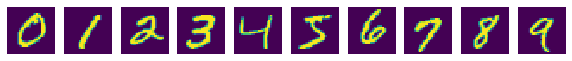

In [11]:
# Plot the original smamples
figure=plt.figure(figsize=(10, 1))
for i in range(10):
    image = train_arrays[i][0].reshape(28,28)
    figure.add_subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(image)
plt.show()

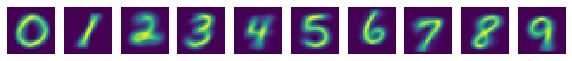

In [12]:
# Plot the reconstructed smamples
fig=plt.figure(figsize=(10, 1))
for i in range(10):
    image = np.dot(bases[i] , train_weights[i][:, 11]).reshape(28,28)
    fig.add_subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(image)
plt.show()

In [13]:
# Find the predicted label using the weights stored in H
def Predict_Labels(H):
    labels = []
    for k in range(H.shape[1]):
        labels.append(0)
        threshold = 0
        j = 0
        for i in range(10):
            h = H[j: j+3, k]
            j += 3
            if np.linalg.norm(h)>threshold:
                threshold = np.linalg.norm(h)
                labels[k] = i
    return labels

In [14]:
# Find the labels using predict
np.random.seed(0)
predicted_labels = [[] for k in range(10)]
W = np.concatenate((bases[0], bases[1]), 1)
for i in range(2, 10): W = np.concatenate((W,bases[i]),1)
for label in range(10):
    print("Test Label: " , label)
    samples = np.array(test_arrays[label]).T
    H = np.random.rand(nmf_components*10, samples.shape[1])
    reconstruction_errors = []
    epsilon = 1e-20
    _, H, _, _ = NMF_Predict(samples, W, H, max_iterations, reconstruction_errors, epsilon)
    labels = Predict_Labels(H)
    predicted_labels[label] = labels

Test Label:  0
Test Label:  1
Test Label:  2
Test Label:  3
Test Label:  4
Test Label:  5
Test Label:  6
Test Label:  7
Test Label:  8
Test Label:  9


In [15]:
total_accuracy = 0
total = 0
for i in range(10):
    accuracy = 0
    total += len(predicted_labels[i])
    for x in predicted_labels[i]:
        if x == i: accuracy+=1
    total_accuracy+=accuracy
    print('Accuracy for Label', i , '=',  accuracy/len(predicted_labels[i]))
    
print('Total Accuracy: ', total_accuracy/total)

Accuracy for Label 0 = 0.9448979591836735
Accuracy for Label 1 = 0.9876651982378855
Accuracy for Label 2 = 0.8788759689922481
Accuracy for Label 3 = 0.8732673267326733
Accuracy for Label 4 = 0.7718940936863544
Accuracy for Label 5 = 0.7892376681614349
Accuracy for Label 6 = 0.954070981210856
Accuracy for Label 7 = 0.8803501945525292
Accuracy for Label 8 = 0.7299794661190965
Accuracy for Label 9 = 0.7324083250743311
Total Accuracy:  0.8567


In [16]:
# Confusion Matrix of shape Predicted*Actual
def create_confusion_matrix(predicted_labels):
    Confusion_Matrix = [[0 for i in range(10)] for j in range(10)]
    for i in range(len(predicted_labels)):
        actual_label = i
        for j in range(len(predicted_labels[i])):
            predict_label = predicted_labels[i][j]
            Confusion_Matrix[predict_label][actual_label]+=1
    return np.array(Confusion_Matrix)

Confusion_Matrix = create_confusion_matrix(predicted_labels)
print(Confusion_Matrix)

[[ 926    0   22    4    0   21   22    4   27   14]
 [   1 1121   12    7   11    4    3   27    9    9]
 [   5    3  907   26   18    6    5   16   13    8]
 [   4    0   29  882    0   64    0    3   63   13]
 [   0    0    1    0  758   10    8   13   22  142]
 [   7    1    3   32    2  704    3    3   71    8]
 [  29    7   14    5   49   26  914    0   15    6]
 [   2    0   28   23   14    9    0  905   21   56]
 [   5    2   16   21   14   39    3    6  711   14]
 [   1    1    0   10  116    9    0   51   22  739]]
